In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
run_names = ['run_0093', 'run_0094', 'run_0095', 'run_0096', 'run_0097', 'run_0098', 'run_0099']

In [4]:
all_runs = {}
for r in run_names:
    # Data through 2017
    run1 = RunManager('StatArbStrategy', r, test_periods=5)
    run1.import_return_frame()
    all_runs[r] = run1

In [5]:
all_combs = {}
for r in run_names:
    comb1 = CombinationSearch()
    comb1.add_run(all_runs[r])
    comb1.params['training_epochs'] = 10
    comb1.start()
    all_combs[r] = comb1

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:46<00:00, 10.73s/it]


Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:47<00:00, 10.87s/it]


Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:46<00:00, 10.74s/it]


Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:47<00:00, 10.80s/it]


Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:45<00:00, 10.56s/it]


Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:46<00:00, 10.66s/it]


Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:45<00:00, 10.47s/it]


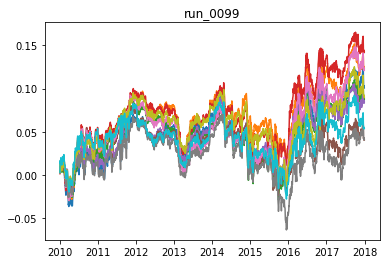

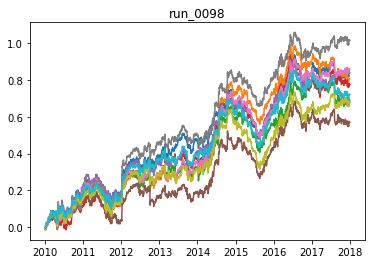

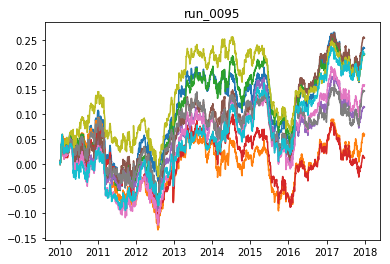

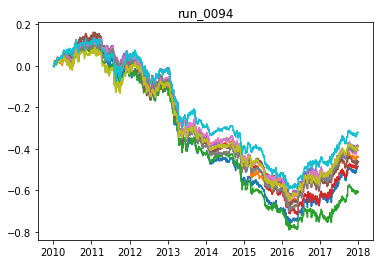

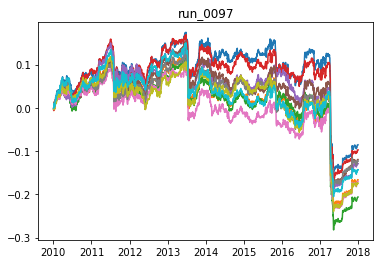

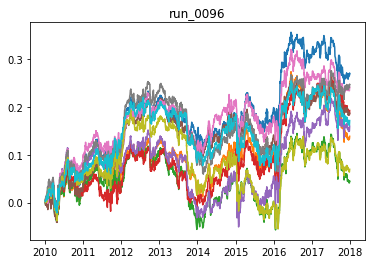

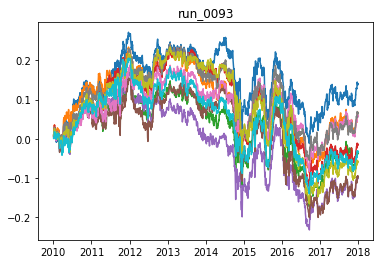

In [6]:
for r in all_combs.keys():
    plt.figure()
    x = all_combs[r]
    plt.plot(x.best_results_returns.dropna().cumsum())
    plt.title(r)
plt.show()